In [1]:
import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"

import geomstats.backend as gs
import matplotlib.pyplot as plt
import torch

from geomstats.geometry.special_orthogonal import SpecialOrthogonal


/Users/franciscoacosta/opt/anaconda3/envs/abn1/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO: Using pytorch backend


In [50]:
def get_synth_immersion(a, m, r, embedding_dim):
    """ Create "wiggly" circles
 

        Parameters
        ----------
        
        a : float
            Primary circle radius/
        m : int
            Number of "wiggles"
        r : float, < 1 
            Amplitude of "wiggles"
        
        Returns
        -------
        synth_immersion : function
            Synthetic immersion from S1 to R^N
        """
    def polar(theta):
        return gs.stack([gs.cos(theta), gs.sin(theta)], axis=-1)

    def synth_immersion(theta):
        #look at einsum
        n_thetas = len(theta)
        wiggly_circle = torch.matmul(
            torch.diag(a * (1 + r * gs.cos(m * theta))),
            polar(theta))
        padded_wiggly_circle = gs.hstack(
            [wiggly_circle, gs.zeros((n_thetas, embedding_dim - 2))])

        so = SpecialOrthogonal(n=embedding_dim)
        
        rot = so.random_point() 

        
        return gs.matmul(rot, padded_wiggly_circle)

    return synth_immersion


In [48]:
g = get_synth_immersion(a = 1, m = 5, r = 0.4)
theta = gs.linspace(0,2*gs.pi,200)
X = g(theta)

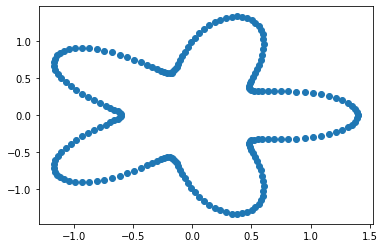

In [49]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])